<a href="https://colab.research.google.com/github/sarvesh2000/Stock-Predection-Web-App/blob/main/FINAL_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Data Collection
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
key="483bd89d87mshce534f1bd4ba6b0p182fcdjsnf08d8fc19c04"

In [ ]:
def get_data(symbol):

    #load the data
    if symbol.upper() == 'AMZN':
        df = pd.read_csv("AMZN.csv")
    elif symbol.upper() == 'TSLA':
        df = pd.read_csv("TSLA.csv")
    elif symbol.upper() == 'GOOG':
        df = pd.read_csv("GOOG.csv")
    elif symbol.upper() == 'AAPL':
        df = pd.read_csv("AAPL.csv")

In [ ]:
def predict(symbol):
    df = pdr.get_data_yahoo(symbol)
    df1 = df. reset_index()['Close']
    scaler = MinMaxScaler(feature_range=(0,1))
    df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
    return plt.plot(df1)


In [ ]:
df = pdr.get_data_yahoo('IDEA.NS')
df1 = df. reset_index()['Close']


In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))


model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
11/11 [==============================] - 1s 101ms/step - loss: 0.1033 - val_loss: 0.0213
Epoch 2/300
11/11 [==============================] - 0s 21ms/step - loss: 0.0136 - val_loss: 0.0212
Epoch 3/300
11/11 [==============================] - 0s 18ms/step - loss: 0.0070 - val_loss: 0.0169
Epoch 4/300
11/11 [==============================] - 0s 17ms/step - loss: 0.0057 - val_loss: 0.0167
Epoch 5/300
11/11 [==============================] - 0s 18ms/step - loss: 0.0047 - val_loss: 0.0088
Epoch 6/300
11/11 [==============================] - 0s 18ms/step - loss: 0.0038 - val_loss: 0.0067
Epoch 7/300
11/11 [==============================] - 0s 18ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/300
11/11 [==============================] - 0s 19ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 9/300
11/11 [==============================] - 0s 19ms/step - loss: 0.0027 - val_loss: 6.8229e-04
Epoch 10/300
11/11 [==============================] - 0s 18ms/step - loss: 0.0027 - val_loss: 6

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form --- rescaling
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:

### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


In [ ]:
x_input = test_data[331:].reshape(1,-1)


In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<3):

    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])

        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)

        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1




In [ ]:

day_new=np.arange(1,101) #testdata 100indexes
day_pred=np.arange(101,104) #101-131-predicted

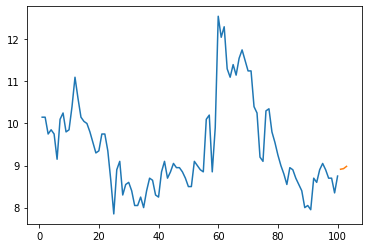

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df1[1131:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('saved_figure.png')

In [ ]:
lst_output

[[0.06965700536966324], [0.06982079893350601], [0.07045244425535202]]

In [ ]:
df1[-1]

array([0.06776018])

In [ ]:
plt.savefig('Predicted.jpg')

<Figure size 432x288 with 0 Axes>